In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)

ride_df=pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
merged_df=city_df.merge(ride_df, left_on='city', right_on='city', how='outer')


In [2]:
# Display the data table for preview
merged_df

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850
5,Richardfort,38,Urban,2018-04-21 03:44:04,9.54,3698147103219
6,Richardfort,38,Urban,2018-02-03 00:14:26,29.04,4982665519010
7,Richardfort,38,Urban,2018-02-08 15:50:12,16.55,2270463070874
8,Richardfort,38,Urban,2018-04-03 15:07:34,40.77,9496210735824
9,Richardfort,38,Urban,2018-02-19 14:09:20,27.11,8690324801449


## Bubble Plot of Ride Sharing Data

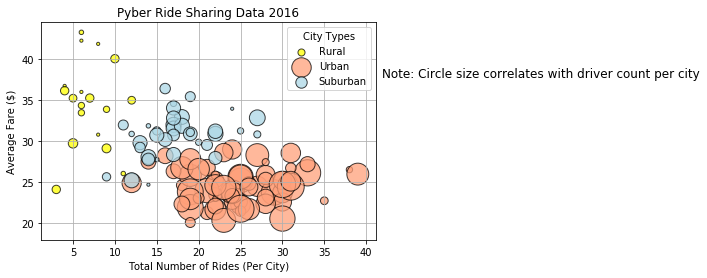

In [3]:
# Obtain the x and y coordinates for each of the three city types
grouped_purchase_data = merged_df.groupby(['city','driver_count','type'])
summary_df=pd.DataFrame({"AvgFare":grouped_purchase_data['fare'].mean(),
                         "RideCount":grouped_purchase_data['ride_id'].count(),
                         "TotalFare":grouped_purchase_data['fare'].sum()
                        }).reset_index()
summary_df


rural_df = summary_df.loc[summary_df['type']=='Rural']
x_rural=rural_df['RideCount']
y_rural=rural_df['AvgFare']
area_rural=rural_df['driver_count']*10

urban_df=summary_df.loc[summary_df['type']=='Urban']
x_urban=urban_df['RideCount']
y_urban=urban_df['AvgFare']
area_urban=urban_df['driver_count']*10

suburban_df=summary_df.loc[summary_df['type']=='Suburban']
x_suburban=suburban_df['RideCount']
y_suburban=suburban_df['AvgFare']
area_suburban=suburban_df['driver_count']*10
# Incorporate the other graph properties

plt.title("Pyber Ride Sharing Data 2016")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)

# Build the scatter plots for each city types
plt.scatter(x_rural,y_rural,s=area_rural,alpha=0.75,facecolors="yellow", edgecolors="black",label="Rural")
plt.scatter(x_urban,y_urban,s=area_urban,alpha=0.75,facecolors="lightsalmon", edgecolors="black",label="Urban")
plt.scatter(x_suburban,y_suburban,s=area_suburban,alpha=0.75,facecolors="lightblue", edgecolors="black",label="Suburban")

# Create a legend
plt.legend( markerscale=None, fontsize=10,title="City Types")
# Incorporate a text label regarding circle size
plt.text(1.02, 0.75, "Note: Circle size correlates with driver count per city", {'color': 'black', 'fontsize': 12},
         transform=plt.gca().transAxes)
# Save Figure
plt.savefig("pyber.png")

In [4]:
# Show plot
plt.show()

## Total Fares by City Type

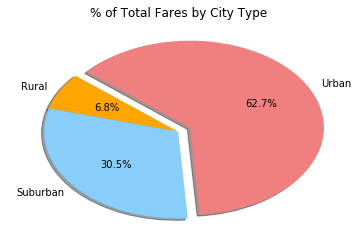

In [5]:
# Calculate Type Percents
group_by_city_type = merged_df.groupby(['type'])
grouped_fares_by_city_type=pd.DataFrame({'TotalFare':group_by_city_type['fare'].sum()}).reset_index()
grouped_fares_by_city_type
# Build Pie Chart

labels=grouped_fares_by_city_type['type']
fares=grouped_fares_by_city_type['TotalFare']
colors=[ "orange",  "lightskyblue","lightcoral"]
explode = (0, 0,  0.1)
plt.pie(fares, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Fares by City Type")
# Save Figure
plt.savefig('faresByCityType.png')


In [6]:
# Show Figure
plt.show()

## Total Rides by City Type

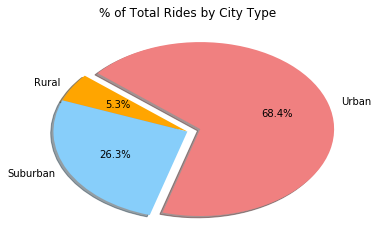

In [7]:
# Calculate Ride Percents
grouped_ridecount_by_city_type=pd.DataFrame({'TotalRides':group_by_city_type['ride_id'].count()}).reset_index()
grouped_ridecount_by_city_type
# Build Pie Chart
labels=grouped_ridecount_by_city_type['type']
fares=grouped_ridecount_by_city_type['TotalRides']
colors=[ "orange",  "lightskyblue","lightcoral"]
explode = (0, 0,  0.1)
plt.pie(fares, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Rides by City Type")
# Save Figure
plt.savefig('totalRidesByCityType.png')
# Save Figure


In [8]:
# Show Figure
plt.show()

## Total Drivers by City Type

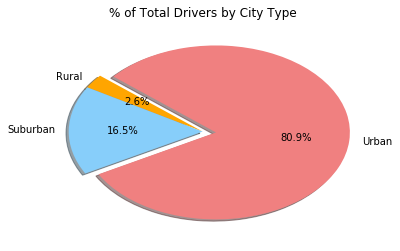

In [9]:
# Calculate Ride Percents
group_by_city_type = city_df.groupby('type')
grouped_ridecount_by_city_type=pd.DataFrame({'DriverCount':group_by_city_type['driver_count'].sum()}).reset_index()
grouped_ridecount_by_city_type
# Build Pie Chart
labels=grouped_ridecount_by_city_type['type']
fares=grouped_ridecount_by_city_type['DriverCount']
colors=[ "orange",  "lightskyblue","lightcoral"]
explode = (0, 0,  0.1)
plt.pie(fares, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Drivers by City Type")
# Save Figure
plt.savefig('totalDriversByCityType.png')
# Save Figure

In [47]:
# Show Figure
plt.show()